In [19]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=122993 sha256=3210d2a3f7a6526e34555d316eb74ed51b43a6cbe779d564000a91b1bb911db4
  Stored in directory: /tmp/pip-ephem-wheel-cache-zju29tzs/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes.sg",
                      path_links=path_directory + "latapy_test_intro_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  12
Nb of segmented links :  32.0
Nb of event times :  26


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


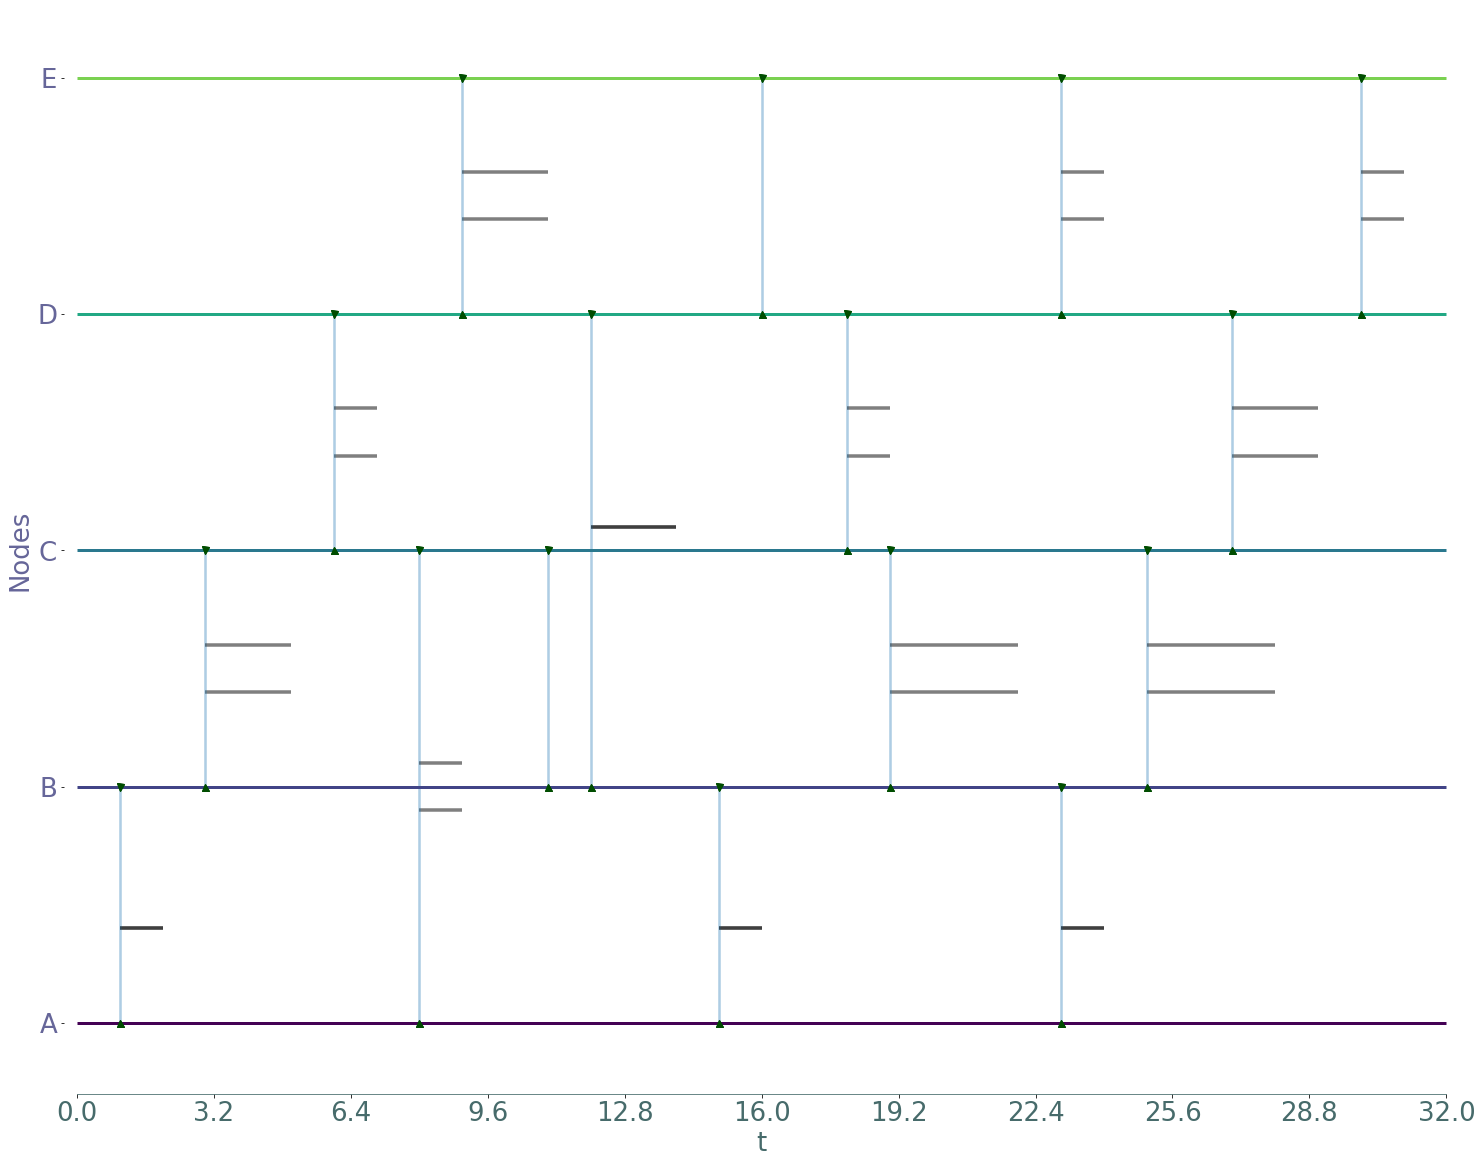

In [2]:
S.plot()

In [3]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [4]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [5]:
events, events_reverse = bt.events_dic(nouveau)

In [6]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [7]:
node = 3

In [8]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [9]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [10]:
cur_best[1]

{0.0: (-inf, inf),
 1.0: (-inf, inf),
 2.0: (-inf, inf),
 3.0: (-inf, inf),
 5.0: (-inf, inf),
 6.0: (-inf, inf),
 7.0: (-inf, inf),
 8.0: (-inf, inf),
 9.0: (-inf, inf),
 11.0: (7.0, 2),
 12.0: (12.0, 1),
 14.0: (14.0, 1),
 15.0: (14.0, 1),
 16.0: (14.0, 1),
 18.0: (-inf, inf),
 19.0: (19.0, 2),
 22.0: (19.0, 2),
 23.0: (19.0, 2),
 24.0: (19.0, 2),
 25.0: (19.0, 2),
 27.0: (27.0, 2),
 28.0: (28.0, 2),
 29.0: (-inf, inf),
 30.0: (-inf, inf),
 31.0: (-inf, inf),
 32.0: (-inf, inf)}

In [11]:
pre[2]

{0.0: {},
 1.0: {},
 2.0: {},
 3.0: {},
 5.0: {},
 6.0: {(3, 6.0): (6.0, 6.0)},
 7.0: {(3, 7.0): (6.0, 7.0)},
 8.0: {},
 9.0: {},
 11.0: {},
 12.0: {},
 14.0: {},
 15.0: {},
 16.0: {},
 18.0: {(3, 18.0): (18.0, 18.0)},
 19.0: {(3, 19.0): (18.0, 19.0)},
 22.0: {},
 23.0: {},
 24.0: {},
 25.0: {},
 27.0: {(3, 27.0): (27.0, 27.0)},
 28.0: {(3, 28.0): (27.0, 28.0)},
 29.0: {(3, 29.0): (28.0, 29.0)},
 30.0: {},
 31.0: {},
 32.0: {}}

In [12]:
lat_triplet[1]

[[7.0, 11.0, 2],
 [12.0, 12.0, 1],
 [14.0, 14.0, 1],
 [19.0, 19.0, 2],
 [27.0, 27.0, 2],
 [28.0, 28.0, 2]]

In [13]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

In [14]:
for e in GT:
    print(e,list(GT[e].nodes()))

(15.0, 16.0) [(1, 14.0), (0, 16.0)]
(8.0, 9.0) [(2, 7.0), (0, 9.0)]
(23.0, 24.0) [(1, 19.0), (0, 24.0), (1, 22.0)]
(19.0, 22.0) [(2, 19.0), (1, 22.0)]
(25.0, 27.0) [(2, 27.0), (1, 27.0)]
(27.0, 28.0) [(2, 28.0), (1, 28.0)]


In [15]:
GT[(15.0, 16.0)].successors((1, 14.0))

[(0, 16.0)]

In [16]:
edge = bt.edges(nouveau)
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse,edge)
mx = bt.max_volume_superposition(GT)
print(mx)

3 1 12.0 -1 -1 -1 -1
edge after 12.0 14.0
t1p,t2p 12.0 12.0
3 1 14.0 -1 -1 -1 -1
t1p,t2p 12.0 14.0
1 0 14.0 12.0 14.0 -2 -1
edge after 15.0 16.0
t1p,t2p 15.0 15.0
1 0 14.0 12.0 14.0 -2 -1
t1p,t2p 15.0 16.0
3 2 6.0 -1 -1 -1 -1
edge after 6.0 7.0
t1p,t2p 6.0 6.0
3 2 7.0 -1 -1 -1 -1
t1p,t2p 6.0 7.0
2 0 7.0 6.0 7.0 -2 -1
edge after 8.0 9.0
t1p,t2p 8.0 8.0
2 0 7.0 6.0 7.0 -2 -1
t1p,t2p 8.0 9.0
2 1 7.0 6.0 7.0 -2 -1
t1p,t2p 11.0 11.0
3 2 18.0 -1 -1 -1 -1
edge after 18.0 19.0
t1p,t2p 18.0 18.0
3 2 19.0 -1 -1 -1 -1
t1p,t2p 18.0 19.0
2 1 19.0 18.0 19.0 -2 -1
edge after 19.0 22.0
t1p,t2p 19.0 19.0
2 1 19.0 18.0 19.0 -2 -1
t1p,t2p 19.0 22.0
2 1 19.0 18.0 19.0 -2 -1
edge after 25.0 27.0
t1p,t2p 25.0 25.0
3 2 27.0 -1 -1 -1 -1
edge after 27.0 28.0
t1p,t2p 27.0 27.0
2 1 27.0 27.0 27.0 27.0 28.0
edge after 27.0 28.0
t1p,t2p 25.0 27.0
3 2 28.0 -1 -1 -1 -1
edge after 28.0 29.0
t1p,t2p 27.0 28.0
2 1 28.0 27.0 28.0 28.0 29.0
t1p,t2p 27.0 28.0
2 1 28.0 27.0 28.0 28.0 29.0
t1p,t2p 27.0 28.0
3 2 29.0 -1 -1 -

In [17]:
before[1]

{0.0: False,
 1.0: False,
 2.0: False,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: False,
 8.0: False,
 9.0: False,
 11.0: False,
 12.0: False,
 14.0: True,
 15.0: False,
 16.0: False,
 18.0: False,
 19.0: False,
 22.0: False,
 23.0: False,
 24.0: False,
 25.0: False,
 27.0: False,
 28.0: True,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [19]:
after[1]

{0.0: False,
 1.0: False,
 2.0: False,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: False,
 8.0: False,
 9.0: False,
 11.0: False,
 12.0: True,
 14.0: False,
 15.0: False,
 16.0: False,
 18.0: False,
 19.0: False,
 22.0: False,
 23.0: False,
 24.0: False,
 25.0: False,
 27.0: True,
 28.0: False,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [20]:
before[2]

{0.0: False,
 1.0: False,
 2.0: False,
 3.0: False,
 5.0: False,
 6.0: False,
 7.0: True,
 8.0: False,
 9.0: False,
 11.0: False,
 12.0: False,
 14.0: False,
 15.0: False,
 16.0: False,
 18.0: False,
 19.0: True,
 22.0: False,
 23.0: False,
 24.0: False,
 25.0: False,
 27.0: False,
 28.0: True,
 29.0: True,
 30.0: False,
 31.0: False,
 32.0: False}

In [21]:
after[2]

{0.0: False,
 1.0: False,
 2.0: False,
 3.0: False,
 5.0: False,
 6.0: True,
 7.0: False,
 8.0: False,
 9.0: False,
 11.0: False,
 12.0: False,
 14.0: False,
 15.0: False,
 16.0: False,
 18.0: True,
 19.0: False,
 22.0: False,
 23.0: False,
 24.0: False,
 25.0: False,
 27.0: True,
 28.0: True,
 29.0: False,
 30.0: False,
 31.0: False,
 32.0: False}

In [22]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [23]:
sigma_r

{(0, 0.0): vol(0,0),
 (0, 1.0): vol(0,0),
 (0, 2.0): vol(0,0),
 (0, 3.0): vol(0,0),
 (0, 5.0): vol(0,0),
 (0, 6.0): vol(0,0),
 (0, 7.0): vol(0,0),
 (0, 8.0): vol(1,0),
 (0, 9.0): vol(1.0,1),
 (0, 11.0): vol(1.0,1),
 (0, 12.0): vol(1.0,1),
 (0, 14.0): vol(1.0,1),
 (0, 15.0): vol(1,0),
 (0, 16.0): vol(1.0,1),
 (0, 18.0): vol(1.0,1),
 (0, 19.0): vol(1.0,1),
 (0, 22.0): vol(1.0,1),
 (0, 23.0): vol(3.0,1),
 (0, 24.0): vol(3.0,2),
 (0, 25.0): vol(3.0,2),
 (0, 27.0): vol(3.0,2),
 (0, 28.0): vol(3.0,2),
 (0, 29.0): vol(3.0,2),
 (0, 30.0): vol(3.0,2),
 (0, 31.0): vol(3.0,2),
 (0, 32.0): vol(3.0,2),
 (1, 0.0): vol(0,0),
 (1, 1.0): vol(0,0),
 (1, 2.0): vol(0,0),
 (1, 3.0): vol(0,0),
 (1, 5.0): vol(0,0),
 (1, 6.0): vol(0,0),
 (1, 7.0): vol(0,0),
 (1, 8.0): vol(0,0),
 (1, 9.0): vol(0,0),
 (1, 11.0): vol(1,0),
 (1, 12.0): vol(1,0),
 (1, 14.0): vol(1,0),
 (1, 15.0): vol(1,0),
 (1, 16.0): vol(1,0),
 (1, 18.0): vol(1,0),
 (1, 19.0): vol(1,0),
 (1, 22.0): vol(3.0,1),
 (1, 23.0): vol(3.0,1),
 (1, 24.0): 

In [24]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [25]:
contri[1]

{11.0: (0.0, 12.0),
 12.0: (0.0, 12.0),
 14.0: (14.0, 32.0),
 19.0: (14.0, 27.0),
 27.0: (14.0, 27.0),
 28.0: (28.0, 32.0)}

In [26]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [27]:
deltasvvt

{(2, 7.0): vol(0,0),
 (0, 8.0): vol(108.5,0),
 (0, 9.0): vol(0,0),
 (1, 14.0): vol(0,0),
 (0, 15.0): vol(178.5,0),
 (0, 16.0): vol(0,0),
 (1, 19.0): vol(40.0,0),
 (0, 23.0): vol(45.0,0),
 (1, 22.0): vol(0,0),
 (0, 24.0): vol(0,0),
 (1, 11.0): vol(7.0,0),
 (3, 12.0): vol(0,0),
 (1, 12.0): vol(0,0),
 (3, 14.0): vol(0,0),
 (2, 19.0): vol(0,0),
 (1, 25.0): vol(0,0),
 (2, 27.0): vol(0,0),
 (1, 27.0): vol(0,0),
 (2, 28.0): vol(0,0),
 (1, 28.0): vol(0,0),
 (3, 6.0): vol(0,0),
 (2, 6.0): vol(0,0),
 (3, 7.0): vol(0,0),
 (3, 18.0): vol(0,0),
 (2, 18.0): vol(0,0),
 (3, 19.0): vol(0,0),
 (3, 27.0): vol(0,0),
 (3, 28.0): vol(0,0),
 (3, 29.0): vol(0,0),
 (2, 29.0): vol(0,0),
 (3, 9.0): vol(0,0),
 (4, 9.0): vol(0,0),
 (3, 11.0): vol(0,0),
 (4, 11.0): vol(0,0),
 (3, 16.0): vol(0,0),
 (4, 16.0): vol(35.0,0),
 (3, 23.0): vol(0,0),
 (4, 23.0): vol(0,0),
 (3, 24.0): vol(0,0),
 (4, 24.0): vol(0,0),
 (3, 30.0): vol(0,0),
 (4, 30.0): vol(0,0),
 (3, 31.0): vol(0,0),
 (4, 31.0): vol(0,0)}

In [28]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt)

In [29]:
contribution

{1: {12.0: vol(0,0),
  16.0: vol(0,0),
  15.0: vol(178.5,0),
  14.0: vol(178.5,0),
  11.0: vol(7.0,0),
  25.0: vol(0,0),
  24.0: vol(0,0),
  23.0: vol(45.0,0),
  22.0: vol(45.0,0),
  19.0: vol(40.0,0),
  27.0: vol(0,0),
  28.0: vol(0,0),
  0.0: vol(0,0),
  1.0: vol(0,0),
  2.0: vol(0,0),
  3.0: vol(0,0),
  5.0: vol(0,0),
  6.0: vol(0,0),
  7.0: vol(0,0),
  8.0: vol(0,0),
  9.0: vol(0,0),
  18.0: vol(0,0),
  29.0: vol(0,0),
  30.0: vol(0,0),
  31.0: vol(0,0),
  32.0: vol(0,0)},
 3: {12.0: vol(0,0),
  14.0: vol(178.5,0),
  6.0: vol(0,0),
  7.0: vol(115.5,0),
  18.0: vol(0,0),
  19.0: vol(85.0,0),
  27.0: vol(0,0),
  28.0: vol(0,0),
  29.0: vol(0,0),
  9.0: vol(0,0),
  11.0: vol(0,0),
  16.0: vol(35.0,0),
  23.0: vol(0,0),
  24.0: vol(0,0),
  30.0: vol(0,0),
  31.0: vol(0,0),
  0.0: vol(0,0),
  1.0: vol(0,0),
  2.0: vol(0,0),
  3.0: vol(0,0),
  5.0: vol(0,0),
  8.0: vol(0,0),
  15.0: vol(0,0),
  22.0: vol(0,0),
  25.0: vol(0,0),
  32.0: vol(0,0)},
 0: {16.0: vol(0,0),
  15.0: vol(178.5,0)

In [31]:
contribution[3]

{12.0: vol(0,0),
 14.0: vol(178.5,0),
 6.0: vol(0,0),
 7.0: vol(115.5,0),
 18.0: vol(0,0),
 19.0: vol(85.0,0),
 27.0: vol(0,0),
 28.0: vol(0,0),
 29.0: vol(0,0),
 9.0: vol(0,0),
 11.0: vol(0,0),
 16.0: vol(35.0,0),
 23.0: vol(0,0),
 24.0: vol(0,0),
 30.0: vol(0,0),
 31.0: vol(0,0),
 0.0: vol(0,0),
 1.0: vol(0,0),
 2.0: vol(0,0),
 3.0: vol(0,0),
 5.0: vol(0,0),
 8.0: vol(0,0),
 15.0: vol(0,0),
 22.0: vol(0,0),
 25.0: vol(0,0),
 32.0: vol(0,0)}